In [2]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
 """))

<span style="color:green; font-size: 35px; font-weight: bold;"> 데이터프레임과 시리즈(Pandas) </span></br>
**pip install pandas / conda install pandas (아나콘다 프롬프트)**  </br>
데이터프레임은 반드시 2차원임

# 1절. 판다스 패키지 
- 데이터 분석을 위해 반드시 알아야 할 패키지. 넘파이 기반으로 다른 많은 라이브러리와 잘 통합되도록 설계
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임(excel의 스프레드시트)을 제공

<font color='red' fontsize=10> <strong>
판다스의 장점 : 파일io(편리하게 제공),부분 데이터 추출,크기 변경,데이터 분할,병합,데이터정렬(직관적),결측치 처리,데이터분할, 피벗과 언피벗(와이드포멧 ↔롱포멧)에 용이함 </font>

[Pandas API reference](https://pandas.pydata.org/docs/reference/index.html) \
[Pandas docs](https://pandas.pydata.org/docs/user_guide/index.html)

In [ ]:
# 롱포멧 데이터, 와이드포멧 데이터 / 

In [2]:
import pandas as pd 
pd.__version__  #버전확인

'1.5.3'

In [12]:
data = pd.read_csv('data/ch09_member4.csv', encoding='utf-8') #encoding = utf8 기본값
display(data)
type(data)

,name,age,email,address
0,홍길동,22,a@a.com,신림동
1,김길동,32,b@b.com,신림동
2,신길동,42,c@c.com,신림동


pandas.core.frame.DataFrame

In [14]:
data = pd.read_csv('data/ch09_member1.csv',
                   encoding='utf-8',
                   header=None,
                   names=['name','age', 'email','address'])
data

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


In [15]:
data = pd.read_csv('data/ch09_member1.csv',
                   encoding='utf-8',
                   header=None,
                   names=['name','age', 'email','address'])
data.head(2) #최초 상위 2줄만 가져오기

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구


In [17]:
data = pd.read_json('data/ch09_member1.json') #pandas 기본값이 utf8
data

,name,age,email,address
0,홍길동,22,a@a.com,서울
1,신길동,32,b@b.com,서울
2,김길동,42,c@c.com,서울


In [18]:
iris = pd.read_hdf('data/ch09_iris.hdf5', key='iris') #딥러닝 모델용으로 저장 hdf
iris.head() #상위 5개, 헤더를 안 쓰면 상위 5개만 추출

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
iris = pd.read_hdf('data/ch09_iris.hdf5', key='iris') #딥러닝 모델용으로 저장 hdf
iris.head(9)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa


# 2절. 데이터프레임 만들기
## 2.1 딕셔너리를 이용해서 데이터프레임

In [23]:
#딕셔너리를 데이터프레임으로 변환
d = {'kor': [100,90], 'mat':[95,99]}
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [25]:
#데이터 프레임을 딕셔너리로 변환
df.to_dict()

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [27]:
df.to_numpy()


array([[100,  95],
       [ 90,  99]], dtype=int64)

In [32]:
#딕셔너리 리스트를 데이터 프레임으로 변환
#하나의 데이터가 실수이면 전체 데이터가 실수로 변경.
#데이터 프레임은 동일자료형으로 들어가야 함
d = [{'kor':100, 'mat':95},{'kor':90.,'mat':99}]
df = pd.DataFrame(data=d)
df

,kor,mat
0,100.0,95
1,90.0,99


In [37]:
df.dtypes #열들의 타입을 물어보는 것
df.info() #세부적인 타입을 알려주는 것 (info를 더 많이 씀)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     2 non-null      float64
 1   mat     2 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


In [39]:
#딕셔너리 데이터
#3번째 딕셔너리에는 mat점수가 없음(결측치=실수형)
d = [{'kor':100, 'mat':100},{'kor':90,'mat':91},{'kor':93}]
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,100.0
1,90,91.0
2,93,NaN


In [42]:
#딕셔너리 데이터
#3번째 딕셔너리에는 mat점수가 없음(결측치)
d = [{'kor':100, 'mat':100},{'kor':90,'mat':91},{'kor':93,'math':100}]
df = pd.DataFrame(data=d)
df
#결측치는 실수형(float64), 정수형변환 불가(결측ㅣ대체를 한후 정수형변환)

,kor,mat,math
0,100,100.0,NaN
1,90,91.0,NaN
2,93,NaN,100.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      int64  
 1   mat     2 non-null      float64
 2   math    1 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 200.0 bytes


## 2.2리스트를 이용해서 데이터 프레임 만들기

In [44]:
# 리스트 데이터를 딕셔너리로 만들기
title = ['책1','책2','책3','책4']
price = [15000,18000,28000,31000]

df = pd.DataFrame(data={'title':title,'price':price})
df

,title,price
0,책1,15000
1,책2,18000
2,책3,28000
3,책4,31000


In [46]:
import numpy as np
np.c_[title,price]

array([['책1', '15000'],
       ['책2', '18000'],
       ['책3', '28000'],
       ['책4', '31000']], dtype='<U11')

In [63]:
#2차원 리스트를 데이터프레임으로 변환
l = [['책1',15000],
     ['책2',18000],
     ['책3',28000],
     ['책4',31000]]
df = pd.DataFrame(l, columns=['책이름','가격'])
df

# l = [['책1',15000],
#      ['책2', 18000],
#      ['책3', 10000]]
# df = pd.DataFrame(l, columns=['책이름','가격'])
# df

,책이름,가격
0,책1,15000
1,책2,18000
2,책3,28000
3,책4,31000


In [56]:
df = pd.DataFrame(np.c_[title,price],columns=['책이름','가격'])
df

,책이름,가격
0,책1,15000
1,책2,18000
2,책3,28000
3,책4,31000


## 2.3 read_csv

In [67]:
%ls C:\ai_x\download\ShareData\상가정보_20250331
#%파워셀 명령어 (매직명령어)

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3664-591E

 C:\ai_x\download\ShareData\상가정보_20250331 디렉터리

2025-04-28  오후 04:16    <DIR>          .
2025-04-28  오후 04:16    <DIR>          ..
2025-04-21  오후 03:23         9,303,432 소상공인시장진흥공단_상가(상권)정보_세종_202503.csv
               1개 파일           9,303,432 바이트
               2개 디렉터리  161,594,753,024 바이트 남음


In [68]:
df = pd.read_csv(r'C:/ai_x/download/ShareData/상가정보_20250331/소상공인시장진흥공단_상가(상권)정보_세종_202503.csv',
                low_memory=False, #데이터 용량이 클 경우만 기입
                 nrows=30)        #상위 30행만

df.shape

#기본이라서 아래 안 적어도 됨
#encoding = 'utf-8' 
# sep=','    

(30, 39)

In [70]:
df #열이 많아서 안 보임


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700019175,세종수이비인후과의원,NaN,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,...,3611011600200050002000001,행정중심복합도시,세종특별자치시 세종특별자치시 해밀3로 43,NaN,30092,NaN,NaN,NaN,127.264487,36.528585
1,MA010120220800005576,우보설렁탕,NaN,I2,음식,I201,한식,I20102,국/탕/찌개류,I56111,...,4473025023100230051035586,NaN,세종특별자치시 세종특별자치시 조치원읍 문화로 24,339885.0,30025,NaN,NaN,NaN,127.301068,36.603770
2,MA010120220800006182,메이빈,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,3611010300106640011000001,강남프라자,세종특별자치시 세종특별자치시 시청대로 127,339008.0,30151,NaN,3.0,NaN,127.286081,36.479674
3,MA010120220800008970,명품동태탕,NaN,I2,음식,I201,한식,I20102,국/탕/찌개류,I56111,...,3611035024103040008000001,행복마을,세종특별자치시 세종특별자치시 장군면 월현윗길 29,339914.0,30055,NaN,1.0,NaN,127.223073,36.501346
4,MA010120220800024017,컴119,NaN,S2,수리·개인,S201,컴퓨터 수리,S20101,컴퓨터/노트북/프린터 수리업,S95110,...,3611010600102180000000001,골든타원,세종특별자치시 세종특별자치시 노을3로 99,339014.0,30130,NaN,2.0,NaN,127.253843,36.479828
5,MA010120220800047182,포지션,NaN,G2,소매,G216,안경·정밀기기 소매,G21603,사진기/기타 광학기기 소매업,G47829,...,3611034022102850004000001,NaN,세종특별자치시 세종특별자치시 금남면 발산1길 67,339833.0,30083,NaN,NaN,NaN,127.283364,36.456746
6,MA010120220800046344,이화공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,3611010700106840001000001,나릿재마을2단지,세종특별자치시 세종특별자치시 어울누리로 67,339003.0,30128,NaN,NaN,NaN,127.265373,36.487283
7,MA010120220800046670,김가네칼국수,NaN,I2,음식,I201,한식,I20105,국수/칼국수,I56112,...,4473025029102660002000001,NaN,세종특별자치시 세종특별자치시 조치원읍 큰말2길 3,339807.0,30030,NaN,NaN,NaN,127.289301,36.595365
8,MA010120220800048962,굿모닝보청기,NaN,G2,소매,G215,의약·화장품 소매,G21502,의료기기 소매업,G47812,...,4473025021100010014037459,NaN,세종특별자치시 세종특별자치시 조치원읍 조치원7길 6,339883.0,30024,NaN,1.0,NaN,127.300613,36.601726
9,MA010120220800042909,청년피자,조치원점,I2,음식,I210,기타 간이,I21003,피자,I56192,...,3611025028102670008000001,주건축물제,세종특별자치시 세종특별자치시 조치원읍 행복10길 9,339887.0,30021,NaN,2.0,NaN,127.291133,36.604147


In [73]:
#판다스 디스플레이옵션을 증가하여 다 보이게 하기
pd.options.display.max_columns #기본 20개 
pd.options.display.max_rows #기본 60개 

60

In [74]:
pd.options.display.max_columns = 39 #39열까지 display가능

In [76]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700019175,세종수이비인후과의원,NaN,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,일반의원,36,세종특별자치시,36110,세종특별자치시,36110525,해밀동,3611011600,해밀동,3611011600200050002,2,산,5,2.0,세종특별자치시 세종특별자치시 해밀동 산5-2,361103352828,세종특별자치시 세종특별자치시 해밀3로,43,NaN,3611011600200050002000001,행정중심복합도시,세종특별자치시 세종특별자치시 해밀3로 43,NaN,30092,NaN,NaN,NaN,127.264487,36.528585


In [79]:
df.head(1).T

,0
상가업소번호,MA010120220700019175
상호명,세종수이비인후과의원
지점명,NaN
상권업종대분류코드,Q1
상권업종대분류명,보건의료
상권업종중분류코드,Q102
상권업종중분류명,의원
상권업종소분류코드,Q10201
상권업종소분류명,내과/소아과 의원
표준산업분류코드,Q86201


### (1) csv 파일 불러오기(기본값) - 모든 행 다 가져오기

In [18]:
# encoding='utf-8', sep=',', csv 파일의 첫번째 줄을 header로 인식, #이 있는 줄도 데이터로 인식
import pandas as pd
member = pd.read_csv('data/ch11_member.csv')
member
#이름중 1자리의 사람만 뽑거나, 지역중 일부에 사는 사람 뽑는것 쉽게 가능 

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [3]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [6]:
# 형변환 Age열 : int64 -> int 16으로 변환 / 'int' = int32 / 'float'= float 32
#특정한 행,열을 가져오는것 = 시리즈
import numpy as np
member['Age'].astype(np.int16)   #member가 바뀐게 아님

0    20
1    30
2    21
3    22
4    23
5    24
Name: Age, dtype: int16

In [7]:
member['Age'] = member['Age'].astype(np.int16)
member.info() #Age의 타입이 int64에서 int16으로 바뀜

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int16 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int16(1), object(4)
memory usage: 332.0+ bytes


In [8]:
# member['Birth'] 형변환 :object(문자) - > datetime64
member['Birth_as'] = member['Birth'].astype('datetime64')
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      6 non-null      object        
 1   Age       6 non-null      int16         
 2   Email     6 non-null      object        
 3   Address   6 non-null      object        
 4   Birth     6 non-null      object        
 5   Birth_as  6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int16(1), object(4)
memory usage: 380.0+ bytes


In [17]:
member['Birth_to'] = pd.to_datetime(member['Birth']) # astype()함수보다 안전한 형변환
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      4 non-null      object        
 1   Age       4 non-null      int64         
 2   Email     4 non-null      object        
 3   Address   4 non-null      object        
 4   Birth     4 non-null      object        
 5   Birth_to  4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 320.0+ bytes


### (2) 특정행 제외하고 csv 파일 읽기

In [14]:
member = pd.read_csv('data/ch11_membercp949.csv') #에러남(utf-8없음)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 32: invalid start byte

In [16]:
member = pd.read_csv('data/ch11_membercp949.csv',
                      encoding='cp949',
                      skiprows=[1,6])  #1번째, 6번째 제외하고 읽기
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


### (3) 주석(#)제외하고, datetime형 필드 지정하여 읽기

In [24]:
member = pd.read_csv('data/ch11_membertab.csv',
                    sep='\t',
                    comment='#',
                    parse_dates=['Birth']) #parse_dates 리스트에 넣은 값은 날짜형으로 변경됨.
                                           #datetime형으로 읽어올 필드 지정
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [26]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


### (4) sep='|', 상위 5행만 읽어오기

In [28]:
member = pd.read_csv('data/ch11_membersep.csv',
                    sep='|',
                    nrows =5)
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 2.4 패키지에서 가져오기 : iris 데이터 (3가지 방법) 
### iris 가져오기 방법 1.sklearn (머신러닝 패키지)
    sklearn 머신러닝 패키지

In [9]:
from sklearn import datasets
# from sklearn.datasets import load_iris
# sklearn : 머신러닝을 위한 함수, 머신러닝 패키지(전처리함수, 머신러닝, 성능평가를 위한 함수, 학습데이터셋)
iris = datasets.load_iris()
# iris 딕셔너리 형태
iris.keys()
# iris.data 독립변수
# iris.target 종속변수

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
print(iris.DESCR) #iris 데이터 셋에 대한 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
iris.data #독립변수
iris['data'][:3] #데이터 프레임으로 만들 데이터 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [12]:
iris.feature_names #독립변수의 열이름
iris['feature_names'] 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
#데이터 프레임에 들어갈 열이름 만들기 (빈스트링 없애고, 맨뒤에 cm없애기)
columns = [col[:-5].replace(' ', '_') for col in iris.feature_names] + ['species']
columns
#col[:-5]:맨뒤에 (cm)를 없애기 위한 작업
#replace:나눠진 데이터에서 빈스트링을 언더바로 바꾸기 위한 작업

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [14]:
iris.target #종속변수 
iris['target'] #머신러닝시 종속변수

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
# iris['target_names'][iris['target']] 가독성이 떨어짐
iris.target_names[[iris.target]]

array([['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
  

In [18]:
#독립변수
data = iris.data
#종속변수
target = iris.target_names[iris.target]
data.shape,target.shape #독립변수와 종속변수의 차원

((150, 4), (150,))

In [19]:
# 독립변수와 종속변수를 stack한 후 데이터프레임으로 출력
pd.DataFrame(data = np.hstack( (data, target.reshape(-1,1) ) ),
            columns=columns)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
import pandas as pd 
import numpy as np

### iris 가져오기 방법 2.statsmodels (R 데이터)
    statsmodels - r데이터들이 많이 있음.통계 패키지, 인터넷이 가능해야 사용할 수 있음


In [23]:
from statsmodels.datasets import get_rdataset

# 'iris' 데이터셋을 'datasets' 패키지에서 가져옵니다.
iris_dataset = get_rdataset('iris', package='datasets', cache=True)
#packate = R의 datasets 패키지에서 가져오기
#True는 한번 다운로드한 데이터셋을 내PC(임시폴더)에 저장. False는 한번만 

# 데이터셋 정보 출력
print(iris_dataset)

<class 'statsmodels.datasets.utils.Dataset'>


In [32]:
iris = iris_dataset.data
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [25]:
iris['Sepal.Length']
iris.Sepal.Length #열 이름에 ',', ' ' 이 있으면 irist.Sepal.Length 접근불가 (오류 발생)

AttributeError: 'DataFrame' object has no attribute 'Sepal'

In [26]:
iris ['Sepal.Length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [27]:
iris.columns #컬럼 이름 불러오기 

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [31]:
iris.columns = [col.lower().replace('.','_') for col in iris ]  # replace(','→ '_') / 소문자로 변경 
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


### iris 가져오기 방법 3.seaborn (시각화 패키지)
    데이터 프레임

In [33]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [35]:
# 데이터 프레임을 csv 파일로
iris.to_csv('data/ch11_iris.csv',
           #sep=',', encoding='utf-8'
           index=False) #행이름 제외하고 파일 출력 (True가 기본값)

In [36]:
import pandas as pd
load_iris = pd.read_csv('data/ch11_iris.csv')
load_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [39]:
#데이터 프레임을 압출파일로 저장  / 압축 파일(.zip, .gz, .bz2)로 씀  (gz가 압축력이 높음)
iris.to_csv('data/ch11_iris.gz',index=False,compression='infer') #infer 확장자에 따라서 알아서 압축

In [40]:
load_iris = pd.read_csv('data/ch11_iris.gz',
                        compression='infer') #infer 확장자에 따라 풀기
load_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 3절. 이름 지정하기 (행,열)
## 3.1 열이름 지정하기

In [4]:
import pandas as pd
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [106]:
#열이름 변경 (헤더 변경)
member.columns = ['이름','나이','이메일','주소','생년월일'] #헤더 갯수와 동일하게 작성 필수
member

,이름,나이,이메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [5]:
member.columns

Index(['Name', 'Age', 'Email', 'Address', 'Birth'], dtype='object')

In [44]:
member.columns.name = '정보' #컬럼들의 이름(이름,나이,이메일,주소,생년월일) 없애려면 None 쓰기
member

정보,이름,나이,이메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 3.2 행 이름 지정하기

In [46]:
member.index #0부터 5까지 있음

RangeIndex(start=0, stop=5, step=1)

In [48]:
member.index = range(11,16) 
member

정보,이름,나이,이메일,주소,생년월일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [49]:
member.index = ['가','나','다','라','마']
member

정보,이름,나이,이메일,주소,생년월일
가,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
나,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
다,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
라,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
마,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [51]:
member.index = range(0, len(member)) #리셋말고 이렇게 번호를 다시 지정할 수 있음
member

정보,이름,나이,이메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [52]:
member.index = ['동','서','남','북','중']
member

정보,이름,나이,이메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [54]:
member.index.name = None
member

정보,이름,나이,이메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [55]:
print(member.index.name)

None


In [58]:
member.loc['남','이름'] #loc을 이용하여 행이름과 열이름으로 데이터 부분 조회가 가능

'홍길남'

In [68]:
#index는 동,서,남,북,중 인데 이름을 인덱스로 만들고 싶을 때
#특정열을 index로 setting
member1 = member.set_index('이름') #이름열이 index로 setting (이름열이 없어짐)
# member1.loc['홍길동']
member1

정보,나이,이메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [ ]:
#member를 수정하려면 
# (1) 할당
# (2)inplace 매개변수에 True (기본이 False)

member.set_index('이름', inplace=True)  #이름열을 index로 만드는 법

In [69]:
member.head(1)

정보,이름,나이,이메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [70]:
#index를 컬럼(열)로 바꾸기 (원상복귀)
member.reset_index()

정보,index,이름,나이,이메일,주소,생년월일
0,동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [72]:
member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 동 to 중
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   이름      5 non-null      object        
 1   나이      5 non-null      int64         
 2   이메일     5 non-null      object        
 3   주소      5 non-null      object        
 4   생년월일    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 412.0+ bytes


In [75]:
member.loc['동', '생년월일']

Timestamp('1999-01-01 00:00:00')

In [83]:
#시리즈(날짜형).dt.year : datetime형에서 가능. datetime열의 날짜 및 시간에 관련된 정보만 추출 가능(year,month,day)
member['생년월일'].dt.year

동    1999
서    1999
남    1999
북    1999
중    1999
Name: 생년월일, dtype: int64

In [86]:
member['생년월일'].dt.weekday # 0월, 1화, 2수, 3목, 4금, 5토, 6일

동    4
서    2
남    0
북    5
중    5
Name: 생년월일, dtype: int64

In [103]:
member['생년월일'].dt.weekday == 4

동     True
서    False
남    False
북    False
중    False
Name: 생년월일, dtype: bool

## 3.3 레벨 이름 지정하기

In [111]:
member.columns = [['기본정보','기본정보','기본정보','추가정보','추가정보'],
                 ['이름', '나이', '이메일', '주소', '생년월일']]
member.columns.names = ['대분류','소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이            이메일       주소       생년월일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [113]:
member.index = [['좌우','좌우','상하','상하','상하'],
                ['동','서','남','북','중']]
member.index.names = ['레벨1','레벨2']
member

대분류     기본정보                        추가정보           
소분류       이름  나이            이메일       주소       생년월일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [115]:
member.loc[('좌우','동'),'기본정보']

소분류
이름               홍길동
나이                20
이메일    hong@hong.com
Name: (좌우, 동), dtype: object

In [120]:
member.loc[('상하','중'),'기본정보']

소분류
이름              홍길중
나이               23
이메일    mid@hong.com
Name: (상하, 중), dtype: object

# 4절. 부분 데이터 조회
    [] 열이름과 조건만 넣을 수 있음
- member['이름'] 특정열
- member[조건]
- member.loc[행이름, 열이름:열이름] 슬라이싱이 가능 (열이름,행이름)
- member.iloc[0,2:4][행번호,열번호] #iloc은 번호로 접근하는 방식 

In [124]:
member = pd.read_csv('data/ch11_member.csv', comment='#',parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1 열 조회

In [129]:
member['Name'], member.Name

(0    홍길동
 1    홍길서
 2    홍길남
 3    홍길북
 4    홍길중
 Name: Name, dtype: object,
 0    홍길동
 1    홍길서
 2    홍길남
 3    홍길북
 4    홍길중
 Name: Name, dtype: object)

In [131]:
#2개의 조건을 가져오기 
member[['Name','Email']]

,Name,Email
0,홍길동,hong@hong.com
1,홍길서,seo@hong.com
2,홍길남,nam@hong.com
3,홍길북,buk@hong.com
4,홍길중,mid@hong.com


In [133]:
#행일 조회할 경우 loc이나 iloc을 사용 
#member[0] = X , []안에는 열이름이나 조건만 사용 가능

## 4.2 loc을 이용한 열 조회
- df.loc[행이름, 열이름] : 행이름과 열이름으로 조회
    * 행이름과 열이름 자리에 list ex.['Name','Email']
    * 행이름과 열이름 자리에 슬라이싱 from:to <from부터 to까지> ※from부터 to앞까지가 아닌 to를 포함
    * (,열이름) 생략시 모든 열을 출력
    

In [134]:
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [139]:
# member 0행부터 2행까지
member.loc[0:2] #행이름 

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [140]:
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [141]:
#동행부터 남행까지 출력
member.loc['동':'남']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [147]:
#member 동행부터 남행, 'Name','Age','Email'
member.loc['동':'남','Name':'Email']

,Name,Age,Email
동,홍길동,20,hong@hong.com
서,홍길서,30,seo@hong.com
남,홍길남,21,nam@hong.com


In [150]:
#member 동행과 남행, 'Name','Emial','Address' 
member.loc[['동','남'],['Name','Email','Address']]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [155]:
#loc을 이용한 특정 열 조회 
member.loc[:,['Name','Address']] #member[['Name','Address']]와 동일

,Name,Address
동,홍길동,서울시 강동구
서,홍길서,서울시 중구
남,홍길남,서울시 강동구
북,홍길북,서울시 관악구
중,홍길중,부산시 중구


In [160]:
member.loc['동'] #1차원 결과 시리즈
#특정행이나 특정열만 access ->결과가 시리즈로 출력 / 2차원은 데이터프레임

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [163]:
member.loc['동':'동'] #1차원이지만 인위적인 데이터 프레임 만들기 #슬라이싱의 경우 결과 2차원

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [164]:
type(member.loc['동']) #시리즈 타입

pandas.core.series.Series

## 4.3 iloc을 이용한 열 조회
- df.iloc[행번호, 열번호] : 행번호와 열번호로 조회
    * 행번호와 열번호 자리에 list ex.[0, 2]
    * 행번호와 열번호 자리에 슬라이싱 from:to:by <from부터 to앞까지 by씩 증가> **※to 미포함** 
    * (,열번호) 생략시 모든 열을 출력 / **※행번호 생략 불가**

In [165]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [174]:
# 0번째~2번째 행 모든 열 
member.iloc[0:3] #열번호 생략시 모든 열

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [179]:
# #1차원 시리즈 데이터 프레임으로 나타내는 방법
# (1) 슬라이싱
# (2) pd.DataFrame 활용

In [177]:
member.iloc[0:1] #(1)슬라이싱을 통해 2차원로 만들고 데이터 프레임으로 출력

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [180]:
pd.DataFrame(member.iloc[0:1]) #(2)pd.DataFrame 활용

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [181]:
# 짝수번째 행의 맨 마지막 열을 제외한 데이터 추출
member.iloc[::2,:-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [185]:
#모든 행의 마지막 열만 데이터프레임으로 추출
# member.iloc[:,-1]  1차원
member.iloc[:,-1:]

,Birth
동,1999-01-01
서,1999-12-01
남,1999-11-01
북,1999-05-01
중,1999-01-30


In [188]:
member.iloc[-1:,-1:]

,Birth
중,1999-01-30


In [190]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [189]:
#0번째 행과 3번째 행 / 0번째 열, 3번째 열, 4번째 열
member.iloc[0:4:2,[0,3,4]]

,Name,Address,Birth
동,홍길동,서울시 강동구,1999-01-01
남,홍길남,서울시 강동구,1999-11-01


## 4.4 조건으로 조회
- df.[조건]:조건에 맞는 행(모든 열)을 모두 조회
- df.loc[조건, 열이름] / df.[조건][열이름] :내가 원하는 조건의 특정열만 조회 /

In [193]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [194]:
member.Age > 22 

동    False
서     True
남    False
북    False
중     True
Name: Age, dtype: bool

In [195]:
member [[False,True,False,False,True]] #True만 조회

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [199]:
#Age가 22보다 큰 데이터 셋 조회 (조건을 []안에 넣어서 추출)
member[member.Age > 22]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [209]:
member[member.Age > 22][['Name','Age']] #슬라이싱은 불가. loc이나 iloc의 경우 가능 

,Name,Age
서,홍길서,30
중,홍길중,23


In [219]:
# loc을 사용해서 Age가 22보다 큰 데이터 셋 조회
member.loc[member.Age>22, 'Name':'Age']

,Name,Age
서,홍길서,30
중,홍길중,23


In [220]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [228]:
#서울시로 시작하는거 가져오기 startswith 있으면true, 없으면 false
#중간에 들어있는 구 찾기  강동구 find ,없으면 -1
address1 = '서울시 강동구'
address2 = '부산시 중구'
print(address1.startswith('서울시'))
print(address2.startswith('서울시'))
print(address1.find('강동구')!=-1)
print(address2.find('강동구')>0)

True
False
True
False


### 시리즈에 문자함수를 쓰기 위해 참조 (ch11 교안 PDF 29P)
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [233]:
member.Address.str.startswith('서울시') #시리즈에는 startswith함수가 없음으로 오류남 / str을 붙여야 함

동     True
서     True
남     True
북     True
중    False
Name: Address, dtype: bool

In [234]:
member[member.Address.str.startswith('서울시')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [241]:
#Address에 '강동구'가 포함된 행
member[member.Address.str.find('강동구')!=-1]
member[member.Address.str.count('강동구')>0]
member[member.Address.str.contains('강동구')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [242]:
# Address에 '강동구'가 포함된 'Name','Age'열 조회 
member[member.Address.str.contains('강동구')][['Name','Age']]
member.loc[member.Address.str.contains('강동구'),'Name':'Age']

,Name,Age
동,홍길동,20
남,홍길남,21


In [247]:
# 1999년도 태어난 사람만 조회 
member[member.Birth.dt.year<2000]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [255]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [309]:
# 퀴즈 iris 
# 1. sepal_length 열만 출력
# iris['sepal_length']

# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
# iris.loc[:10, 'sepal_length':'petal_width']
# iris.iloc[:11, :-1]

# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
# iris.loc[3:10,['sepal_length','petal_length']]
# iris.iloc[3:11,[0,2]]

# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
# iris.loc[[0,50,100]]
# iris.iloc[:101:50]

# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
# iris.loc[[0,25,50,75,100,125], 'petal_length':'petal_width']
# iris.iloc[::25, 2:-1]

# 6. species가 versicolor인 데이터의 모든 열
# iris[iris.species=='versicolor']

# 7. species가 setosa인 데이터 최초 5개 행만 출력
# iris[iris.species=='setosa'].head()
# iris[iris.species=='setosa'].iloc[:5]

# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
# iris[iris.sepal_length>=6.5].head()
# iris[iris.sepal_length>=6.5].iloc[:5]


# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
#iris[iris.sepal_length >= 7.2][['sepal_length','sepal_width','petal_length']]
#iris.loc[iris.sepal_length >= 7.2, 'sepal_length':'petal_length']


# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열



# iris[ (iris.species=='versicolor') & (iris.sepal_length>6.5)]
# import numpy as np
# iris[ np.logical_and(iris.species=='versicolor',
#                     iris.sepal_length>6.5)]

,sepal_length,sepal_width,petal_length
105,7.6,3.0,6.6
107,7.3,2.9,6.3
109,7.2,3.6,6.1
117,7.7,3.8,6.7
118,7.7,2.6,6.9
122,7.7,2.8,6.7
125,7.2,3.2,6.0
129,7.2,3.0,5.8
130,7.4,2.8,6.1
131,7.9,3.8,6.4


In [296]:
import numpy as np
np.logical_and(True, True)

True

# 5절. 데이터 추가 및 삭제 
## 5.1 데이터 프레임의 요소 삭제
- df.drop(행이름이나 열이름, axis) : axis=0 : 행삭제 / axis=1 :열삭제

In [286]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [289]:
# (1)단일 행 삭제
member.drop('중') #axis=0 이 기본값

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [305]:
# (2)복수행 삭제
member
member.drop(['서','남'])

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [303]:
# (3) 열 삭제
member.drop(labels=['Age','Birth'],axis=1)

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
서,홍길서,seo@hong.com,서울시 중구
남,홍길남,nam@hong.com,서울시 강동구
북,홍길북,buk@hong.com,서울시 관악구
중,홍길중,mid@hong.com,부산시 중구


## 5.2 데이터 프레임에 요소 추가
- 중간에 추가는 안 됨. 하려면 찢어서 해야함. / 맨 끝에 추가 가능
- 시리즈 만들어서 데이터프레임으로 만들고 찢어진 데이터 취합


### 1)열추가


In [307]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [311]:
# 데이터 프레임에 열 추가(1) : 공통된 값으로 추가 
member['favarite_no'] = 7  #int64 기본값
member

,Name,Age,Email,Address,Birth,favarite_no
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7


In [312]:
member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 동 to 중
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         5 non-null      object        
 1   Age          5 non-null      int64         
 2   Email        5 non-null      object        
 3   Address      5 non-null      object        
 4   Birth        5 non-null      datetime64[ns]
 5   favarite_no  5 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 452.0+ bytes


In [316]:
# 데이터 프레임에 열 추가(2) : 리스트로 추가 
member['fn'] = [7,7,7,7,None] #결측치 : None, np.nan, math.nan (math.nan은 많이 안 씀)
member

,Name,Age,Email,Address,Birth,favarite_no,fn
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7,7.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7,7.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7,7.0
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7,NaN


In [ ]:
#결측치는 정수형 변환 불가(결측치 대체 후 형변환)
member['fn'].astype('int') #에러 발생

In [321]:
pd.Series([7,7]) #1차원 데이터

0    7
1    7
dtype: int64

In [338]:
# 데이터 프레임에 열 추가(3) : 시리즈로 추가
member = pd.read_csv('data/ch11_member.csv',comment='#')
member['fn2'] = pd.Series([7,7,7])
member

,Name,Age,Email,Address,Birth,fn2
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN


In [329]:
 pd.Series([7,7,7]) #자동으로 데이터 이름 발생 0,1,2

0    7
1    7
2    7
dtype: int64

In [332]:
member['fn'] = pd.Series(['test1','test2','test3'], index=[0,3,4]) #인덱스에는 내가 추가하고싶은것 (문자, 숫자 가능)
member

,Name,Age,Email,Address,Birth,fn2,fn
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0,test1
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0,NaN
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0,NaN
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN,test2
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN,test3


In [333]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     5 non-null      object 
 1   Age      5 non-null      int64  
 2   Email    5 non-null      object 
 3   Address  5 non-null      object 
 4   Birth    5 non-null      object 
 5   fn2      3 non-null      float64
 6   fn       3 non-null      object 
dtypes: float64(1), int64(1), object(5)
memory usage: 408.0+ bytes


### 2)행추가

In [341]:
member = pd.read_csv('data/ch11_member.csv')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [342]:
# 행 추가 (1) : 데이터프레임 
# 추가할 데이터를 데이터프레임 -> member(기존), newmember(추가할 데이터 프레임) 연결
# 한줄로 넣는법 : 딕셔너리를 리스트안에 넣어서 
new_member = pd.DataFrame([{'Name':'홍길숙',
                            'Age':26,
                            'Email':'sok@hong.com',
                            'Address':'서울시 마포구',
                            'Birth':'2002-01-01'}])
new_member

,Name,Age,Email,Address,Birth
0,홍길숙,26,sok@hong.com,서울시 마포구,2002-01-01


In [344]:
# 행 추가시 member와 new_member 연결 
# member에 할당해줌으로 member에 들어감
member = pd.concat([new_member,member])
member
#concat 후 리셋을 해야함. index가 동일한값이 두개가있어서

,Name,Age,Email,Address,Birth
0,홍길숙,26,sok@hong.com,서울시 마포구,2002-01-01
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [352]:
#axis=0 기본값 (행 연결) / axis=1(열 연결)
pd.concat([member,new_member], axis=0)

,Name,Age,Email,Address,Birth
0,홍길숙,26,sok@hong.com,서울시 마포구,2002-01-01
1,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
2,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
3,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
4,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
5,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
6,#홍길뜽,24,non@not.com,없는구,2000-01-01
0,홍길숙,26,sok@hong.com,서울시 마포구,2002-01-01


In [353]:
#인덱스 재조정 
#1.range과 len을 통해 인덱스 조정(비추천)
# member.index = range(len(member))
# member
#2.reset이용해서 인덱스 조정(추천)
#reset_index:컬럼으로 기존 인덱스를 놔두고 새로운 인덱스 생성 / drop=True:기존 index를 drop하고 새로운 index생성
member.reset_index(drop=True)
member

,Name,Age,Email,Address,Birth
0,홍길숙,26,sok@hong.com,서울시 마포구,2002-01-01
1,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
2,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
3,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
4,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
5,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
6,#홍길뜽,24,non@not.com,없는구,2000-01-01


# 이거뭐지? 

In [ ]:
# 행 추가(2) : 시리즈 
# 추가할 데이터를 시리즈

# 6절. 병합과 연결
## 6.1 merge()를 이용한 병합

In [358]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                    'c1': [1, 2, 3, 4]})
df2 = pd.DataFrame({'key':['a','b','c','e'],
                    'c2': [5, 6, 7, 8]})
display(df1)
display(df2)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key,c2
0,a,5
1,b,6
2,c,7
3,e,8


In [359]:
df1.merge(df2) #how='inner' : 양쪽 다 일치하는 데이터만 남김

,key,c1,c2
0,a,1,5
1,b,2,6
2,c,3,7


In [361]:
df1.merge(right=df2, how='left') #왼쪽 데이터만 남기고, 오른쪽 데이터는 매칭되는 것만 병합

,key,c1,c2
0,a,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,NaN


In [362]:
df1.merge(right=df2, how='right') #right데이터만 남기고, 왼쪽 데이터는 매칭되는 것만 병합

,key,c1,c2
0,a,1.0,5
1,b,2.0,6
2,c,3.0,7
3,e,NaN,8


In [364]:
df1.merge(df2, how='outer') #모두 병합, 데이터 값이 없는 점은 결측치

,key,c1,c2
0,a,1.0,5.0
1,b,2.0,6.0
2,c,3.0,7.0
3,d,4.0,NaN
4,e,NaN,8.0


In [365]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                    'c1': [1, 2, 3, 4]})
df4 = pd.DataFrame({'key4':['a','b','c','e'],
                    'c2': [5, 6, 7, 8]})
display(df1)
display(df2)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key,c2
0,a,5
1,b,6
2,c,7
3,e,8


In [366]:
df3.merge(df4) #공통된 속성이 없어서 오류 발생 / ()안에 들어간 것이 right = df4

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [367]:
df3.merge(right=df4, left_on='key3', right_on='key4', how='inner')

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7


In [368]:
df3.merge(df4, left_index=True, right_index=True) #pd.concat([df3,df4],1)와 유사 

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


## 6.2 concat()을 이용한 연결
- pd.concat([df1,df2],axis)
        *axis=0(기본값) : 위아래로 연결
        *axis = 1 :  좌우로 연결

In [370]:
#위아래 연결
df1 = pd.DataFrame({'key':['a','b','c','d'],
                    'c1': [1, 2, 3, 4]})
df2 = pd.DataFrame({'key':['a','b','c','e'],
                    'c2': [5, 6, 7, 8]})

pd.concat([df1, df2],axis=0).reset_index(drop=True) 

,key,c1,c2
0,a,1.0,NaN
1,b,2.0,NaN
2,c,3.0,NaN
3,d,4.0,NaN
4,a,NaN,5.0
5,b,NaN,6.0
6,c,NaN,7.0
7,e,NaN,8.0


In [371]:
# 좌우 연결
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                    'c1': [1, 2, 3, 4]})
df4 = pd.DataFrame({'key4':['a','b','c','e'],
                    'c2': [5, 6, 7, 8]})
pd.concat([df3,df4], axis=1)

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


# 7절. 정렬(행이름,열이름,값에 의한 정렬)
'100'< '9' 첫번째 숫자(아스키코드)가 1이 더 작음 \
※그래프는 sort가 선행되어야 함.
- df.sort_index(axis) : 행(axis=0)또는 열(axis=1) 이름으로 정렬
- df.sort_value(by=정렬기준이 될 열 이름,ascending=T/F, inplace=T/F : 값에 의한 정렬)

In [375]:
member = pd.read_csv('data/ch11_member.csv',comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1 행 이름으로 정렬

In [382]:
member.sort_index(axis=0)
member.sort_index(axis='rows',inplace=True) #ascending=True 기본값(오름차순) , 
member

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.2 열이름으로 정렬

In [386]:
member.sort_index(axis=1)
member.sort_index(axis='columns',inplace=True)
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3 값에 의한 정렬

In [390]:
member.sort_values(by='Age') #값기준으로 오름차순 정렬
member.sort_values(by='Age',ascending=False) #값기준으로 내름차순 정렬

,Address,Age,Birth,Email,Name
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동


In [391]:
#정렬 기준이 여러개인 경우 : 'Address'기준으로 오름차순 정렬,'Address'가 같으면 'Age' 오름차순 기준
member.sort_values(by=['Address','Age'])

,Address,Age,Birth,Email,Name
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [394]:
#정렬 기준이 여러개인 경우 : 'Address'기준으로 오름차순 정렬,'Address'가 같으면 'Age' 내림차순 기준
member.sort_values(by=['Address','Age'],
                   ascending=[True,False],
                   inplace=True)
member

,Address,Age,Birth,Email,Name
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


# QQQ

In [403]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [402]:
# (1)sepal_length값 기준(sepal_length같으면 sepal_width기준) 내림차순 정렬 적용(iris에 적용=iris데이터 변경)
iris.sort_values(by=['sepal_length','sepal_width'], ascending=False ,inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica


In [404]:
# (2)(index)행이름 기준으로 정렬 (행이름이 작은것부터 큰것.ascending) (iris에 적용=iris데이터 변경)
iris.sort_index(axis=0, inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [406]:
# (3)열이름(column) 기준 정렬한 내용을 출력(iris에 적용x)
iris.sort_index(axis=1)

,petal_length,petal_width,sepal_length,sepal_width,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa
...,...,...,...,...,...
145,5.2,2.3,6.7,3.0,virginica
146,5.0,1.9,6.3,2.5,virginica
147,5.2,2.0,6.5,3.0,virginica
148,5.4,2.3,6.2,3.4,virginica


# 8절. 기초 통계 분석
        *판다스 : 기초통계 / statsmodels : 난이도 있는 통계
- count : NaN을 제외한 갯수
- min 
- max
- sum 
- cumsum : 누적합
- **mean : 평균**
- rolling(n).mean() : 데이터 변동(노이즈)가 다소 있을 때,추세(패턴)을 부드럽게 보고싶을 때 사용
- **var : 분산**
- **std : 표준편차**
- **median : 중위수 (50% 지점,중간등수)**  
- qunantile : 분위수 - 0사분위수, 1사분위수(25% 지점), 2사분위수:중위수(50%지점), 3사분위수(75%지점), 4사분위수(100%지점)
         IQR = Q3-Q1
         Q1-1.5*IQR ~ Q3+1.5*IQR 이외의 값은 이상치로 지정
         max
         Q3
         Q2
         Q1
         min
- describe : 요약통계량
- corr : 변수들의 상관관계(계수)

In [7]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## 8.1 min,max,mean,std......

In [15]:
iris.min(axis=0) #열별 최소값(문자필드는 코드값이 작은 것)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [20]:
iris.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [27]:
iris.median(axis=0, numeric_only=True,) #행들의 중수(열별 중위수)
#평균,중위수,표준편차,분산 ... 숫자 필드에서 가능
#numeric_only=True : numeric만 사용

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [51]:
#여러개 변수를 묶어서 쓸 때 변수 대문자로 사용 
X = iris.iloc[:,:-1]
X.sample()

,sepal_length,sepal_width,petal_length,petal_width
36,5.5,3.5,1.3,0.2


In [57]:
X.std(axis=0)
X.std(axis='index') #열별 평균

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [58]:
X.mean(axis=1) #행별 평균

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [69]:
#qunantile : 데이터프레임이나 시리즈에서 사분위수
#interpolation='nearest' : 정확한 값이 없으면 있는값 중에서 가장 가까운값 가져오기
df = pd.DataFrame(data=[1, 2, 3, 4, 7, 10, 15], columns=['value'])
df['value'].quantile(q=[0,0.25,0.5,0.75,1.], interpolation='nearest') 

0.00     1
0.25     3
0.50     4
0.75     7
1.00    15
Name: value, dtype: int64

In [70]:
#interpolation='midpoint' : 정확한 구간을 출력
df['value'].quantile(q=[0,0.25,0.5,0.75,1.], interpolation='midpoint') 

0.00     1.0
0.25     2.5
0.50     4.0
0.75     8.5
1.00    15.0
Name: value, dtype: float64

In [72]:
# X.quantile(q=[0]) q=[0]이 기본값
quant = X.quantile(q=[0,0.25,0.5,0.75,1])
quant

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


In [76]:
min = quant.iloc[0,0]
max = quant.iloc[4,0]
q1 = quant.iloc[1,0]
q3 = quant.iloc[3,0]
min < q1-1.5*(q3-q1), max > q3+1.5*(q3-q1)
#for문 할 수 있지만 비추

(False, False)

In [78]:
X.shape, X.count(axis=0) #결측치를 제외한 데이터 갯수

((150, 4),
 sepal_length    150
 sepal_width     150
 petal_length    150
 petal_width     150
 dtype: int64)

In [90]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [95]:
X.rolling(3).sum().iloc[2:] #3개씩 더해서 진행, 앞에 2개는 값이 없으므로 iloc을 통해 삭제

,sepal_length,sepal_width,petal_length,petal_width
2,14.7,9.7,4.1,0.6
3,14.2,9.3,4.2,0.6
4,14.3,9.9,4.2,0.6
5,15.0,10.6,4.6,0.8
6,15.0,10.9,4.5,0.9
...,...,...,...,...
145,20.2,9.5,16.8,7.1
146,19.7,8.8,15.9,6.7
147,19.5,8.5,15.4,6.2
148,19.0,8.9,15.6,6.2


In [82]:
X.rolling(5).sum().iloc[4:] #값이 작을때는 mean보다 sum이 더 좋음 

,sepal_length,sepal_width,petal_length,petal_width
4,24.3,16.4,7.0,1.0
5,24.6,16.8,7.3,1.2
6,24.3,17.2,7.3,1.3
7,24.6,17.4,7.5,1.3
8,24.4,17.2,7.4,1.3
...,...,...,...,...
145,32.9,15.3,27.0,11.3
146,32.3,14.7,26.9,10.9
147,33.0,15.0,27.0,11.0
148,32.4,15.2,26.5,11.0


## 8.2 요약 통계량

In [96]:
# 1)기본 요약 통계량 
iris.describe() #숫자열과 문자열이 같이 있을 경우 : 숫자열만 요약 통계 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [98]:
#문자열의 요약통계량 : 데이터 갯수, 데이터 종류(unique),최빈데이터(top),최빈데이터 갯수(freq)
#top이 setosa인 이유는 맨 앞에 있어서 (세토사 50, 버즈니카 50, 버즈칼라 50 인데 순서에 따라 세토사가 제일 먼저)
iris['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [106]:
# 2)describe()의 include(포함)와 exclude(삭제) 매개변수 
df = pd.DataFrame(data={'a':[1, 2, 3]*2,
                        'b':[2.,1]*3,
                        'c':['aaa']*5+['bbb'],
                        'd':[True,False]*3})
display(df)
df.info()

,a,b,c,d
0,1,2.0,aaa,True
1,2,1.0,aaa,False
2,3,2.0,aaa,True
3,1,1.0,aaa,False
4,2,2.0,aaa,True
5,3,1.0,bbb,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [107]:
df.describe() #숫자열만 기본 요약 통계량

,a,b
count,6.000000,6.000000
mean,2.000000,1.500000
std,0.894427,0.547723
min,1.000000,1.000000
25%,1.250000,1.000000
50%,2.000000,1.500000
75%,2.750000,2.000000
max,3.000000,2.000000


In [108]:
df.describe(include=['float64','bool'])

,b,d
count,6.000000,6
unique,NaN,2
top,NaN,True
freq,NaN,3
mean,1.500000,NaN
std,0.547723,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,1.500000,NaN
75%,2.000000,NaN


In [109]:
df.describe(include='all') #모든열을 다 출력

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,2,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,5,3
mean,2.000000,1.500000,NaN,NaN
std,0.894427,0.547723,NaN,NaN
min,1.000000,1.000000,NaN,NaN
25%,1.250000,1.000000,NaN,NaN
50%,2.000000,1.500000,NaN,NaN
75%,2.750000,2.000000,NaN,NaN


In [110]:
df.describe(include='object')

,c
count,6
unique,2
top,aaa
freq,5


In [116]:
df.describe(exclude=['object','float64'])

,a,d
count,6.000000,6
unique,NaN,2
top,NaN,True
freq,NaN,3
mean,2.000000,NaN
std,0.894427,NaN
min,1.000000,NaN
25%,1.250000,NaN
50%,2.000000,NaN
75%,2.750000,NaN


In [119]:
df['c'].unique() #특정 column의 고유 값들의 종류 추출

array(['aaa', 'bbb'], dtype=object)

In [120]:
df['c'].value_counts() #특정 column의 값들이 몇번 나왔는지 추출

aaa    5
bbb    1
Name: c, dtype: int64

In [121]:
df.select_dtypes(include='object') #특정 column만 추출

,c
0,aaa
1,aaa
2,aaa
3,aaa
4,aaa
5,bbb


In [125]:
df.select_dtypes(exclude='float64') #특정 column만 제거하고 추출

,a,c,d
0,1,aaa,True
1,2,aaa,False
2,3,aaa,True
3,1,aaa,False
4,2,aaa,True
5,3,bbb,False


## 8.3 공분산, 상관계수

In [127]:
X.cov() #공분산을 나타내는 함수

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [128]:
# -1 < 상관계수 < 1
# -1:반비례 관계 / 1:비례관례
# 0에 가까울수록: 두 변수 사이에 선형 관계가 거의 없음
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


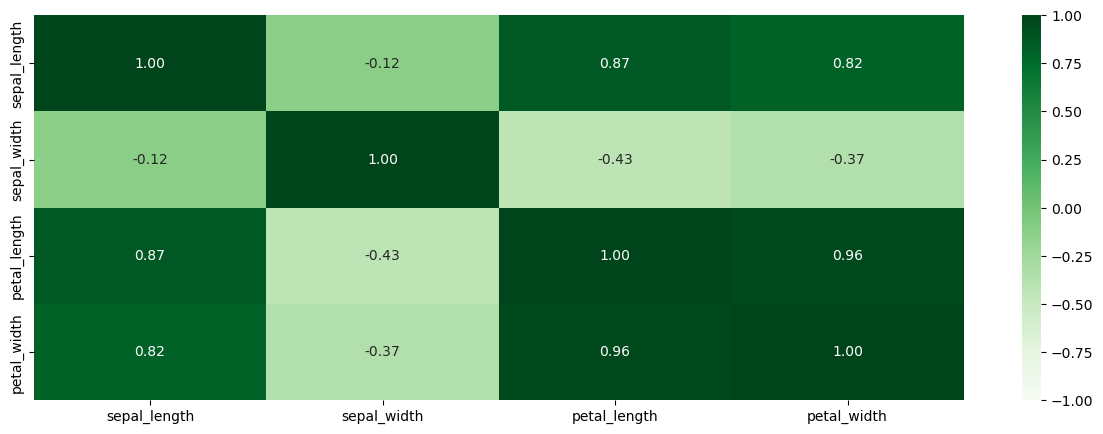

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='Greens')
plt.show()